## Mynd Data Challenge

In this project, there are three phases:

1. Data cleaning
2. EDA
3. Modeling

### 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\arash\Downloads\demographics.xlsx - demographics.csv")
df1.head()

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC
1,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA
2,6i9ov0mud63gm7nq,Damyel,NaN,No,2020-10-09,East,NC
3,t1hal73tnuhhk6qa,Ellie,NaN,Yes,2004-01-31,East,NC
4,nne9gmjh9mnvagsc,Abigail,NaN,No,2007-09-11,Washington,WA


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4863 non-null   object 
 1   First Name      4861 non-null   object 
 2   Monthly Income  141 non-null    float64
 3   Pets            4863 non-null   object 
 4   Date of Birth   4863 non-null   object 
 5   Market          4863 non-null   object 
 6   State           4863 non-null   object 
dtypes: float64(1), object(6)
memory usage: 266.1+ KB


In [4]:
df1.isnull().sum()/len(df1)

ID                0.000000
First Name        0.000411
Monthly Income    0.971006
Pets              0.000000
Date of Birth     0.000000
Market            0.000000
State             0.000000
dtype: float64

There are two missing data in First Name columns and also 97% of Monthly income is missing, I will drop the two missing Fisrt name row and will drop the whole Income in the modeling process.

In [5]:
df1 = df1.dropna(subset=['First Name'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4862
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4861 non-null   object 
 1   First Name      4861 non-null   object 
 2   Monthly Income  141 non-null    float64
 3   Pets            4861 non-null   object 
 4   Date of Birth   4861 non-null   object 
 5   Market          4861 non-null   object 
 6   State           4861 non-null   object 
dtypes: float64(1), object(6)
memory usage: 303.8+ KB


In [6]:
df1.Market.value_counts()

Southwest     1201
East          1125
Central        690
Washington     611
Bay Area       486
SoCal          407
Sacramento     341
Name: Market, dtype: int64

In [7]:
df1.State.value_counts()

CA    1234
AZ     695
TX     690
WA     577
NC     467
NV     461
GA     429
AL      78
FL      61
MS      46
CO      45
TN      44
OR      34
Name: State, dtype: int64

In [8]:
df1.Pets.value_counts()

No     3688
Yes    1173
Name: Pets, dtype: int64

In [9]:
df1.ID.value_counts()

hil50gpk08pak286    12
mk6t4l5da8m1dss2     9
j83uq0j3aud30l74     8
669fasfgrrd204ru     8
773s7rqk9u1dmjeq     8
                    ..
32ucn52qqanfcs5r     1
16uomch7f0qdr3ae     1
58ii18b32qfophe2     1
qhdiluk0il4f4r1q     1
qm0ak1ep77gmi44m     1
Name: ID, Length: 2525, dtype: int64

In [10]:
df1[df1.ID == 'hil50gpk08pak286']

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
333,hil50gpk08pak286,Elizabeth,1500.0,No,2016-10-13,Bay Area,CA
605,hil50gpk08pak286,Abigail,1500.0,No,2016-08-23,Bay Area,CA
613,hil50gpk08pak286,Elizabeth,1.0,No,2016-10-13,Bay Area,CA
731,hil50gpk08pak286,Christian,2400.0,No,2012-11-12,Bay Area,CA
767,hil50gpk08pak286,Abigail,2600.0,No,2016-08-23,Bay Area,CA
1566,hil50gpk08pak286,Elizabeth,2400.0,No,2016-10-13,Bay Area,CA
1571,hil50gpk08pak286,Christian,1.0,No,2012-11-12,Bay Area,CA
1670,hil50gpk08pak286,Abigail,2400.0,No,2016-08-23,Bay Area,CA
2915,hil50gpk08pak286,Christian,1500.0,No,2012-11-12,Bay Area,CA
3699,hil50gpk08pak286,Christian,2600.0,No,2012-11-12,Bay Area,CA


In [11]:
df1[df1.ID == '669fasfgrrd204ru']

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
11,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL
274,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL
980,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL
1267,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL
1704,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL
1744,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL
3269,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL
3748,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL


We can see that each unique ID present a specific household, however the dataframe suggets that there are duplicates data for some of the ID Numbers, therefore I will delete those duplicates.

In [12]:
df1['Monthly Income'].value_counts().sort_index()

0.00        9
1.00        6
123.00      1
557.00      2
800.00      3
840.00      1
974.00      1
1000.00     2
1200.00     2
1300.00     1
1316.00     1
1500.00     6
1650.00     3
1680.00     3
1700.00     1
1780.00     1
1793.00     2
1800.00     1
1892.00     1
1900.00     1
1920.00     3
1925.00     1
2000.00     3
2080.00     1
2100.00     2
2122.00     1
2160.00     2
2200.00     1
2224.39     3
2400.00     4
2500.00     4
2580.00     1
2600.00     3
2800.00     1
2823.36     3
2900.00     3
3000.00     6
3033.00     1
3157.00     1
3200.00     3
3552.00     2
4000.00     6
4333.00     2
4500.00     2
4960.00     2
5000.00     2
5060.00     3
5600.00     3
5800.00     3
5856.00     1
6000.00     1
6258.66     1
6819.08     1
7900.00     2
8000.00     2
8664.00     1
10000.00    5
11833.00    2
12000.00    3
60000.00    2
Name: Monthly Income, dtype: int64

In [13]:
df1[df1['Monthly Income'] == 0]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
167,cm10nprhrb0u3lum,Ethan,0.0,No,2016-05-05,Bay Area,CA
1999,uesouspc8aj4pu5o,Jose,0.0,No,2017-11-03,SoCal,CA
2410,846fkuqo0nentnu5,Iknamullah,0.0,No,2001-07-02,SoCal,CA
2781,5a7i1fep1jl4fhvt,Aaron,0.0,No,2017-01-20,SoCal,CA
3562,cm10nprhrb0u3lum,Evelyn,0.0,No,2014-04-30,Bay Area,CA
3892,onfmuf5l373k26jk,Xzavier,0.0,No,2013-01-15,SoCal,CA
3901,846fkuqo0nentnu5,Sohail,0.0,No,2009-04-09,SoCal,CA
4345,846fkuqo0nentnu5,Somaya,0.0,No,2003-04-10,SoCal,CA
4358,onfmuf5l373k26jk,Joeziah,0.0,No,2016-08-31,SoCal,CA


In [14]:
df1[df1['Monthly Income'] == 1]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
613,hil50gpk08pak286,Elizabeth,1.0,No,2016-10-13,Bay Area,CA
1571,hil50gpk08pak286,Christian,1.0,No,2012-11-12,Bay Area,CA
2022,m6156p61vd1lq5c8,Eduardo,1.0,No,2004-04-25,Washington,WA
2059,m6156p61vd1lq5c8,Jahnuel,1.0,No,2013-09-22,Washington,WA
4146,m6156p61vd1lq5c8,Samantha,1.0,No,2002-03-28,Washington,WA
4519,hil50gpk08pak286,Abigail,1.0,No,2016-08-23,Bay Area,CA


In [15]:
df1.loc[df1['Monthly Income'] == 1, 'Monthly Income'] = 0

In [16]:
g = df1.groupby('ID')['Monthly Income'].mean().reset_index()
g.columns = ['ID1', 'AVG Household Income']
g

,ID1,AVG Household Income
0,1036esvlf765gpvf,NaN
1,103ets9k5pi1lb4c,NaN
2,10meigo5d37fh0nf,NaN
3,10ppscvogqrlda8i,NaN
4,11kipbq7epnv7gn1,NaN
...,...,...
2520,vuvs5i7ts942hnq2,NaN
2521,vv3gnlnaghf2vm27,NaN
2522,vv5bj18ule2sg5q0,NaN
2523,vv7r5j2runbrabuo,NaN


In [17]:
df1 = df1.merge(g, left_on='ID', right_on='ID1')

df1 = df1.drop(['ID1'], axis=1)
df1

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


In [18]:
data = df1[~df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
data

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


In [19]:
data['AVG Household Income'].value_counts()

0.000000        3
2325.000000     3
2823.360000     3
800.000000      3
10000.000000    3
4150.000000     3
2193.333333     3
1920.000000     3
1625.000000     3
3912.195000     3
12000.000000    3
2000.000000     3
2530.000000     3
4960.000000     2
5000.000000     2
1328.500000     2
3063.000000     2
7900.000000     2
60000.000000    2
5750.000000     2
1000.000000     2
4500.000000     2
5916.500000     2
1200.000000     2
8000.000000     2
3376.000000     2
2160.000000     1
3100.000000     1
3040.000000     1
6819.080000     1
2300.000000     1
4428.000000     1
974.000000      1
1940.000000     1
8664.000000     1
3033.000000     1
2157.333333     1
1316.000000     1
3000.000000     1
6258.660000     1
6000.000000     1
1122.500000     1
1712.500000     1
1578.500000     1
1800.000000     1
1980.000000     1
2420.000000     1
3250.000000     1
Name: AVG Household Income, dtype: int64

<AxesSubplot:xlabel='AVG Household Income', ylabel='Count'>

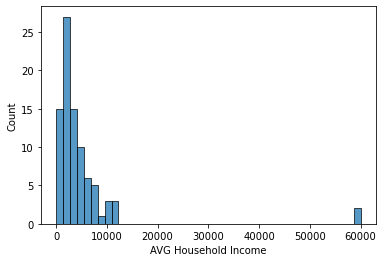

In [20]:
data = data[data['AVG Household Income'].notnull()]
sns.histplot(data['AVG Household Income'])

In [21]:
data[data['AVG Household Income'] == 60000]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
4257,3n7unkoc72m6d4jn,Matilda,60000.0,Yes,2013-08-27,Sacramento,CA,60000.0
4258,3n7unkoc72m6d4jn,Landon,60000.0,Yes,2009-09-19,Sacramento,CA,60000.0


C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


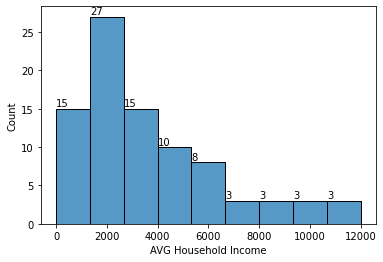

In [22]:
data.loc[data['AVG Household Income'] == 60000, 'AVG Household Income'] = 6000.0


ax = sns.histplot(data['AVG Household Income'])

for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+4.25, p.get_height()+.3)) 
plt.show()

In [23]:
data.ID.value_counts()

4p1gqldb36ldocmb    3
mk6t4l5da8m1dss2    3
hil50gpk08pak286    3
fhq2d8pfeh8a9na4    3
m6156p61vd1lq5c8    3
846fkuqo0nentnu5    3
nfi2m31sr811qbaq    3
9pvkmps8quscn1o1    3
eo83ce5cb1u3er5m    3
sn7tnalsq70eui1l    3
79715lt1aq59idnq    3
fih2b5sso3d2fjq2    2
47jt5k9qtflndops    2
mqdqcf5h52bc4cj1    2
9p197dbbnq5p0om4    2
rso35m0jpv9jufk7    2
on21oh07948391n7    2
gdahf3t8bu83ud0e    2
c9adv6jjm1nm1ao2    2
onfmuf5l373k26jk    2
8rd7tpke0n51hkeq    2
3n7unkoc72m6d4jn    2
19sh5fa544e8dcge    2
8avjs5cl2erp2ktc    2
cm10nprhrb0u3lum    2
fo5nfecmbrthda2s    1
pt5vhgs3se26cmi6    1
vhp4ueplcke166as    1
5a7i1fep1jl4fhvt    1
l099j9givh5t6do     1
jp0ev28sqcl4cnpc    1
sb8ukb4q60iibvlp    1
m6sn704dilop2mph    1
6lho9jeshote6ed5    1
prlfng8eg0dras88    1
2vnholkgh93gii5r    1
uesouspc8aj4pu5o    1
dg00cdau1tt4bot5    1
a48i52hl2eq21od     1
phenfmf9nertkth8    1
vl76ve8pfb3oalr1    1
tn23flfam5n4sqk4    1
q90m1fkc09merhks    1
1n7itrh3k8mq3ngb    1
5qemkdsig3pnjo04    1
s1928jo19j

In [24]:
duplicateRows = df1[df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
duplicateRows

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
34,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL,NaN
35,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL,NaN
38,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL,NaN
39,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL,NaN
121,rijv7ktqts8e67gs,Eva,NaN,Yes,2017-02-08,Central,TX,NaN
...,...,...,...,...,...,...,...,...
4189,8avjs5cl2erp2ktc,Ava,557.0,No,2018-10-25,SoCal,CA,1328.5
4190,8avjs5cl2erp2ktc,Zoe,557.0,No,2008-10-25,SoCal,CA,1328.5
4252,1q26v0rlhnjjvajt,Emalie,4000.0,Yes,2016-03-08,SoCal,CA,3250.0
4546,5qemkdsig3pnjo04,Christopher,2080.0,No,2009-09-26,Bay Area,CA,3040.0


In [25]:
df2 = df1[~df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


Now that I delete duplicate and missing data, I will add the age and gender column. 

#### Age

For age, I assume it's 2032 instead of 2022 so that the monthly income for kids have better reasonig. Also I just substract the year part of date of birth from 2032 instead of writing a function to calculate the exact age just for simplicity.


#### Gender

For gender attribute, I will use a gender_guesser package to guess the gender of the each person.


In [26]:
df2['year'] = pd.DatetimeIndex(df2['Date of Birth']).year
df2['Age'] = 2032 - df2.year
df2.Age.value_counts().sort_index()

<ipython-input-26-46b370aa0d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.DatetimeIndex(df2['Date of Birth']).year
<ipython-input-26-46b370aa0d4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = 2032 - df2.year


-174      1
 11      73
 12     182
 13     228
 14     251
       ... 
 83       2
 84       1
 89       1
 90       1
 127      1
Name: Age, Length: 66, dtype: int64

In [27]:
df2[df2.Age == -174]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,year,Age
1258,u3oms3hqg1orep1s,Kyara,NaN,Yes,2206-07-31,Southwest,AZ,NaN,2206,-174


In [28]:
df2.loc[df2.Age == -174, 'year'] = 2006

C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
df2[df2.Age == 127]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,year,Age
3349,9p197dbbnq5p0om4,Chouida,NaN,No,1905-11-14,Bay Area,CA,10000.0,1905,127


In [30]:
df2.loc[df2.Age == 127, 'year'] = 1995

C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
df2['Age'] = 2032 - df2.year
df2 = df2.drop(['year'], axis=1)
df2.Age.value_counts().sort_index()

<ipython-input-31-487d3eb71b9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = 2032 - df2.year


11     73
12    182
13    228
14    251
15    271
     ... 
82      1
83      2
84      1
89      1
90      1
Name: Age, Length: 64, dtype: int64

In [32]:
import gender_guesser.detector as gender
d = gender.Detector()

In [33]:
n = len(df2['ID'])
df2 = df2.reset_index(drop=True)

for i in range(n):
    df2.loc[i, 'Gender'] = d.get_gender(df2.loc[i, 'First Name'])

In [34]:
df2.Gender.value_counts()

male             1564
unknown          1554
female           1268
mostly_male       182
mostly_female      91
andy               75
Name: Gender, dtype: int64

In [35]:
for i in range(n):
    if df2.loc[i, 'Gender'] == 'mostly_male':
        df2.loc[i, 'Gender'] = 'male'
    elif df2.loc[i, 'Gender'] == 'mostly_female':
        df2.loc[i, 'Gender'] = 'female'
    elif df2.loc[i, 'Gender'] == 'andy':
        df2.loc[i, 'Gender'] = 'male'

In [36]:
df2.Gender.value_counts()

male       1821
unknown    1554
female     1359
Name: Gender, dtype: int64

In [37]:
df2[df2.Gender == 'unknown']['First Name'].unique()

array(['Jayzua-nae', 'Janyla', 'Damyel', ..., 'Kamden', 'Crashaun',
       'kaiden'], dtype=object)

# gender 

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


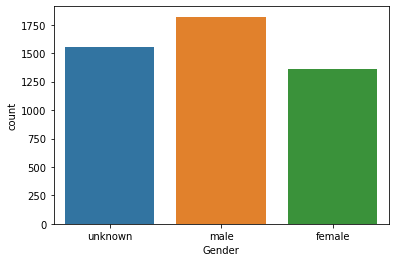

In [38]:
sns.countplot(df2.Gender);

In [39]:
sns.countplot(df2['Age_group']);

KeyError: 'Age_group'

In [ ]:
sns.countplot(df2.Market, hue=df2.Gender);

In [ ]:
sns.countplot(df2.Market);

In [ ]:
sns.countplot(df2.Market, hue=df2.Pets);

In [ ]:
sns.countplot(df2.Market, hue=df2.Age)

In [ ]:
df2['Age_group'] = pd.cut(df2['Age'], [-1, 14, 24, 64, 99], labels=['Children', 'Youth', 'Adult', 'Seniors'])

In [ ]:
df2

In [ ]:
df_i.Pets = pd.get_dummies(df_i['Pets'], drop_first='first')
df_i

In [ ]:
sns.scatterplot(df_i['Age'], df_i['Monthly Income'], hue=df_i['Pets'])

In [ ]:
df2 = df2.fillna(df['Monthly Income'].mean())
df2

In [ ]:
sns.barplot(df2['Market'], df2['Age'])

In [ ]:
df2.Age.hist(bins=20)

In [ ]:
df_i = pd.get_dummies(df2, columns=['Market'], drop_first='first')
df_i

In [ ]:
sns.scatterplot(df_i['Market'], df_i['Age'], hue=df_i['Pets'])

In [ ]:
cross_table = pd.crosstab(index=df2["Age_group"], 
                          columns=df2["Pets"])
cross_table

In [ ]:
cross_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [ ]:
data = df2[df2['Monthly Income'].notnull()]
sns.histplot(data['Monthly Income'])

In [ ]:
data.ID.value_counts()

In [ ]:
a = df2.groupby('ID')['Age'].max().sort_index()
a

In [ ]:
b = df2.groupby('ID')['Age'].min().sort_index()
b

In [ ]:
c = df2.groupby('ID')['Age'].count().sort_index()
c

In [ ]:
df_age = pd.concat([a, b, c], axis=1)
names = ['Max', 'Min', 'Number']
df_age.columns = names

### 2. EDA

In [ ]:

ax[0] = plt.hist(df2.Age, alpha=0.5, bins=20)

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')

In [ ]:
plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Age, hue=df2.Gender, alpha=.4, bins=bins);


In [ ]:
plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Age, hue=df2.Market, alpha=.4, bins=bins);


In [ ]:
plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Market, hue=df2['Age_group'], alpha=.5);


In [ ]:
df_income = df2[df2['Monthly Income'].notnull()]
df_income

In [ ]:
df_income = df_income[df_income['Monthly Income'] > 2]

In [ ]:
bins = df_income['Monthly Income'].max() - df_income['Monthly Income'].min()
plt.hist(df_income['Monthly Income'], bins=int(bins/1000))

In [ ]:
df_income['Monthly Income'].value_counts().sort_index()

In [ ]:
df_income[df_income['Monthly Income'] == 1500.00]

## 3. Model

In [ ]:
X = df2.drop(['ID', 'First Name', 'Monthly Income', 'Date of Birth', 'Age', 'State'], axis=1)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='X1', y='X2', color=y)
    fig.update_layout(autosize=False, width=475, height=475,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

In [ ]:
model = KMeans(n_clusters=3, random_state=13).fit(pd.get_dummies(X))
pred = model.labels_
fig = plt.scatter(X, pred, title="Encoded Categorical Data")
fig

In [ ]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(pd.get_dummies(X))
    inertia.append(algorithm.inertia_)
    
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
X_std = pd.get_dummies(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_std)

# Visualizing the clustering 
plt.scatter(X_pca[:,0], X_pca[:,1],  
           c = KMeans(n_clusters = 3).fit_predict(X_std), cmap ='Blues')
            
plt.show() 

In [ ]:
# Now try the kmeans with t-sne 

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

# Visualizing the clustering 
plt.scatter(X_tsne[:,0], X_tsne[:,1],  
           c = KMeans(n_clusters = 3).fit_predict(X_std), cmap =plt.cm.winter) 
plt.show()

In [ ]:
X_std

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1])

In [2]:
import pandas as pd

## NLP

In [8]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
# sample text for performing tokenization
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern\
side of South America"
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'easternside',
 'of',
 'South',
 'America']

In [5]:
!pip install punkt

ERROR: Could not find a version that satisfies the requirement punkt
ERROR: No matching distribution found for punkt


In [6]:
import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True